<a href="https://colab.research.google.com/github/Redwoods/Arduino/blob/master/ar-iot/py-pandas/iot_json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MongoDB에 저장된 IoT 데이터 시각화

## Pandas: access to the remote json from MongoDB
- The json file is generated on the fly from the express server of Node.js.
- The data retrieved from MongoDB are saved in the json file.
- The data are composed of three time series; temperature, humidity, and luminosity wuth date.


In [2]:
import pandas as pd

In [3]:
# loading json file from MongoDB via web (CORS, port=3030)
url="http://life21c.inje.ac.kr:3030/iot"
df=pd.read_json(url)
print('Large data was retrieved successfully from MongoDB!')

Large data was retrieved successfully from MongoDB!


In [4]:
df.shape, type(df)

((59764, 6), pandas.core.frame.DataFrame)

In [5]:
df.head()

,_id,date,temperature,humidity,luminosity,__v
0,655d950e626237425047ca16,2023-11-22 14:43:42.806,20.3,45.5,63,0
1,655d950e626237425047ca18,2023-11-22 14:43:42.811,20.3,45.5,63,0
2,655d950e626237425047ca17,2023-11-22 14:43:42.811,20.3,45.5,63,0
3,655d950e626237425047ca1a,2023-11-22 14:43:42.812,20.3,45.5,63,0
4,655d950e626237425047ca19,2023-11-22 14:43:42.811,20.3,45.5,63,0


In [6]:
df.tail()

,_id,date,temperature,humidity,luminosity,__v
59759,657178284c01b1f7e12a0a88,2023-12-07 16:45:44.969,23.0,25.3,0,0
59760,657178294c01b1f7e12a0a8a,2023-12-07 16:45:45.973,23.0,25.3,0,0
59761,6571782b4c01b1f7e12a0a8c,2023-12-07 16:45:47.247,23.0,25.3,0,0
59762,6571782c4c01b1f7e12a0a8e,2023-12-07 16:45:48.250,23.0,25.3,0,0
59763,6571782d4c01b1f7e12a0a90,2023-12-07 16:45:49.528,23.0,25.3,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59764 entries, 0 to 59763
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   _id          59764 non-null  object        
 1   date         59764 non-null  datetime64[ns]
 2   temperature  59764 non-null  float64       
 3   humidity     59764 non-null  float64       
 4   luminosity   59764 non-null  int64         
 5   __v          59764 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 2.7+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,59764.0,19.935028,2.178397,0.2,18.0,18.6,22.500,24.1
humidity,59764.0,29.135771,4.249530,20.7,25.3,29.2,31.325,99.9
luminosity,59764.0,22.024915,30.129521,0.0,0.0,1.0,61.000,106.0
__v,59764.0,0.000000,0.000000,0.0,0.0,0.0,0.000,0.0


### Dataframe with date and three sensor values(temperature, humidity, luminosity)

In [9]:
iot_data = df[['date', 'temperature', 'humidity', 'luminosity']]

In [10]:
iot_data.shape

(59764, 4)

In [11]:
iot_data.head()  # date와 3 개의 신호를 확인.

,date,temperature,humidity,luminosity
0,2023-11-22 14:43:42.806,20.3,45.5,63
1,2023-11-22 14:43:42.811,20.3,45.5,63
2,2023-11-22 14:43:42.811,20.3,45.5,63
3,2023-11-22 14:43:42.812,20.3,45.5,63
4,2023-11-22 14:43:42.811,20.3,45.5,63


In [12]:
iot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59764 entries, 0 to 59763
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         59764 non-null  datetime64[ns]
 1   temperature  59764 non-null  float64       
 2   humidity     59764 non-null  float64       
 3   luminosity   59764 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 1.8 MB


In [13]:
# Save iot data in csv file.
iot_data.to_csv('iot_data_231207.csv')

<Axes: title={'center': 'Boxplot of temperature, humidity, and luminosity'}>

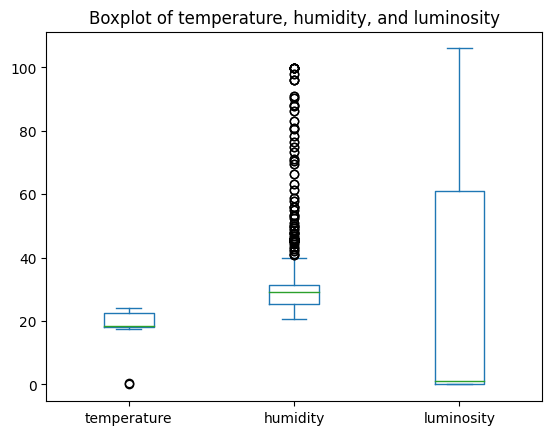

In [14]:
# Plot boxplot
iot_data[['temperature','humidity','luminosity']].plot.box(title='Boxplot of temperature, humidity, and luminosity')
# iot_data.loc[:,'temperature':'luminosity'].plot.box(title='Boxplot of temperature, humidity, and luminosity')
# iot_data.iloc[:,1:].plot.box(title='Boxplot of temperature, humidity, and luminosity')

### Plot time series of sensor data

<Axes: title={'center': 'temperature'}, xlabel='date'>

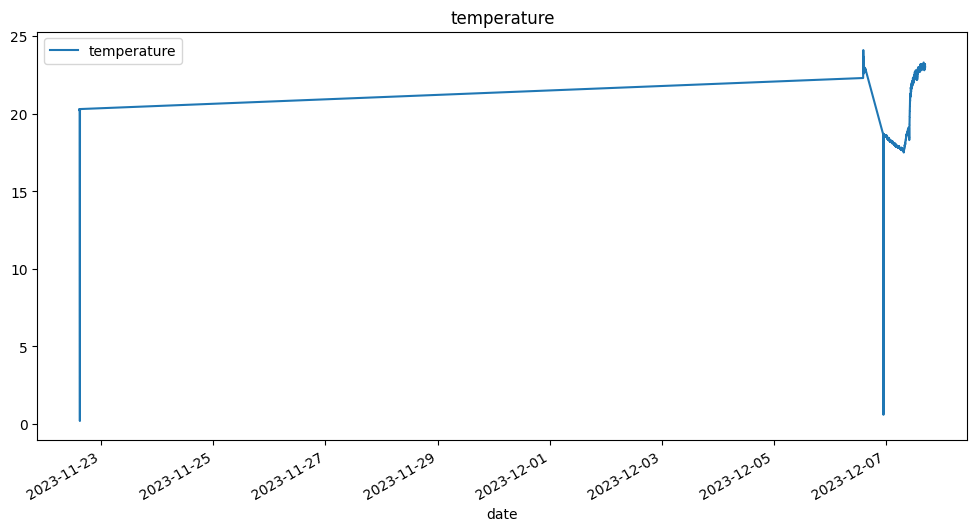

In [15]:
iot_data.plot(x='date', y='temperature', figsize=(12,6), title='temperature')

<Axes: title={'center': 'humidity'}, xlabel='date'>

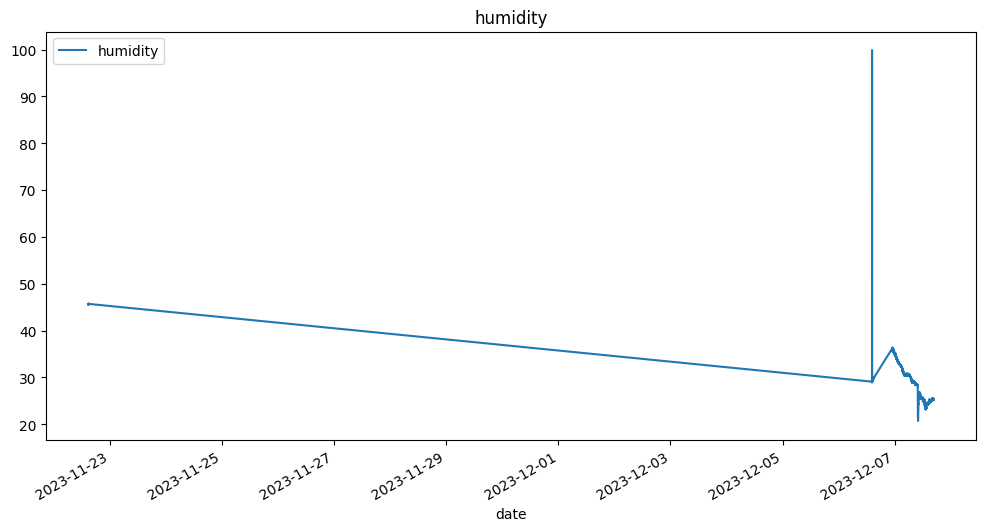

In [16]:
iot_data.plot(x='date', y='humidity', figsize=(12,6), title='humidity')

<Axes: title={'center': 'luminosity'}, xlabel='date'>

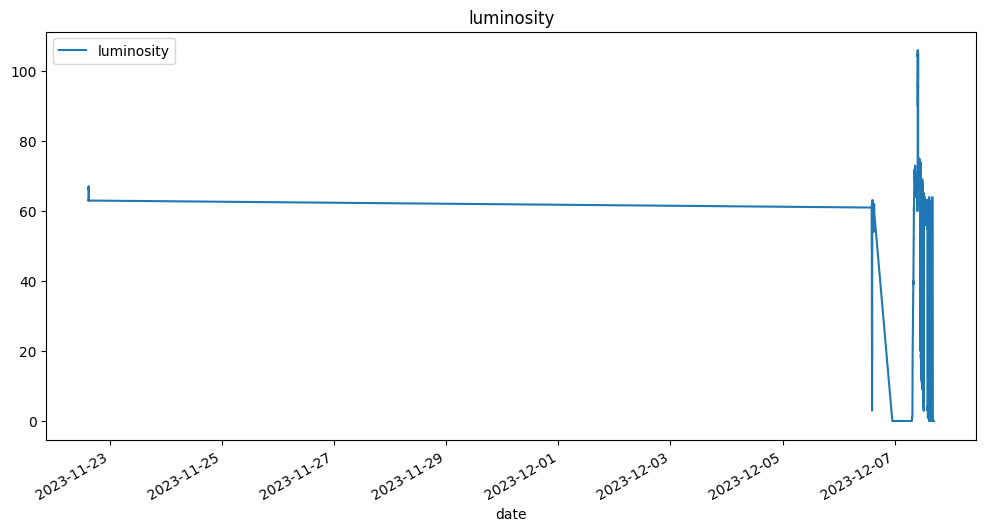

In [17]:
iot_data.plot(x='date', y='luminosity', figsize=(12,6), title='luminosity')

#### 다중그래프 (multiple fgraphs)

<Axes: title={'center': 'temperature and humidity'}, xlabel='date'>

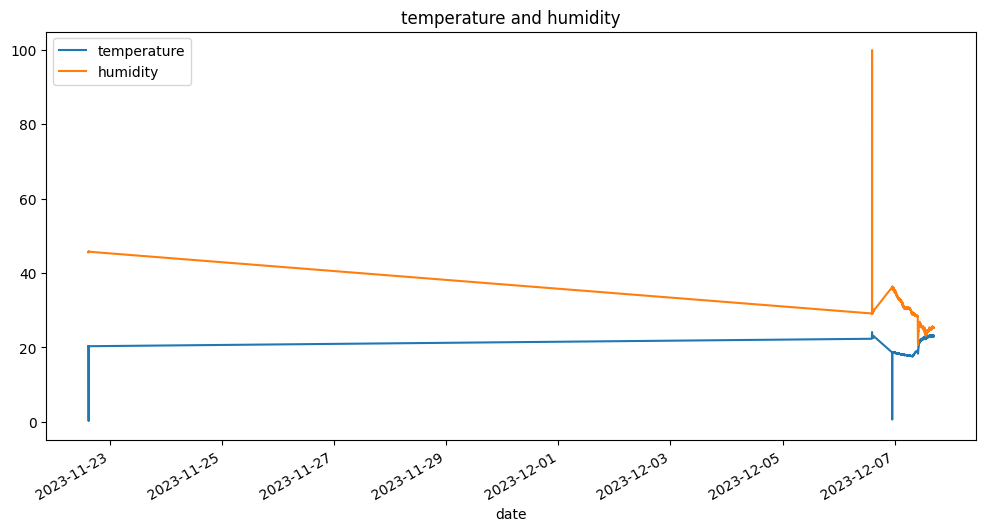

In [18]:
# Plot of ['temperature','humidity']
iot_data.plot(x='date', y=['temperature','humidity'], figsize=(12,6), title='temperature and humidity')

<Axes: title={'center': 'temperature, humidity, and luminosity'}, xlabel='date'>

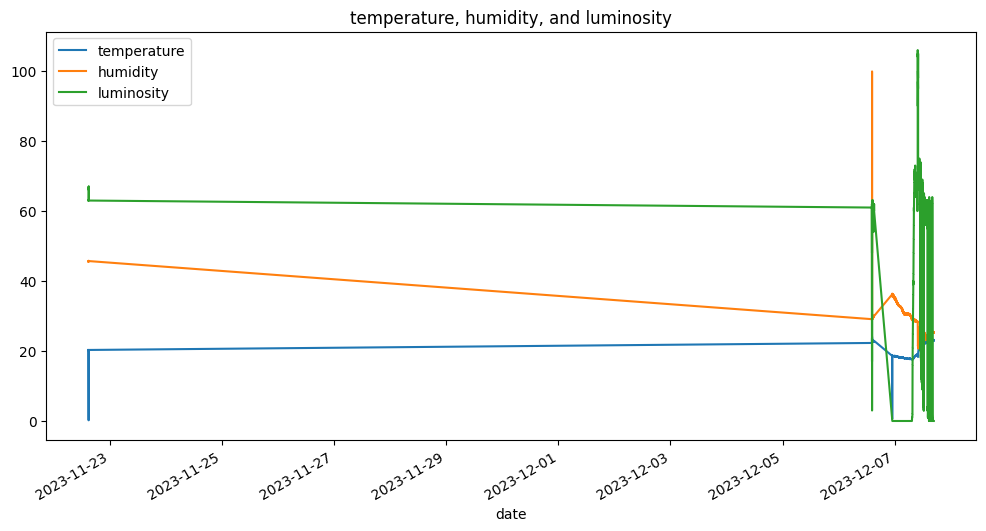

In [19]:
# Plot of ['temperature','humidity','luminosity']
iot_data.plot(x='date', y=['temperature','humidity','luminosity'], figsize=(12,6),
             title='temperature, humidity, and luminosity')

#### Plot the mean of sensor data

In [20]:
iot_data[['temperature','humidity','luminosity']].mean()

temperature    19.935028
humidity       29.135771
luminosity     22.024915
dtype: float64

<Axes: title={'center': 'Mean of temperature, humidity, and luminosity'}>

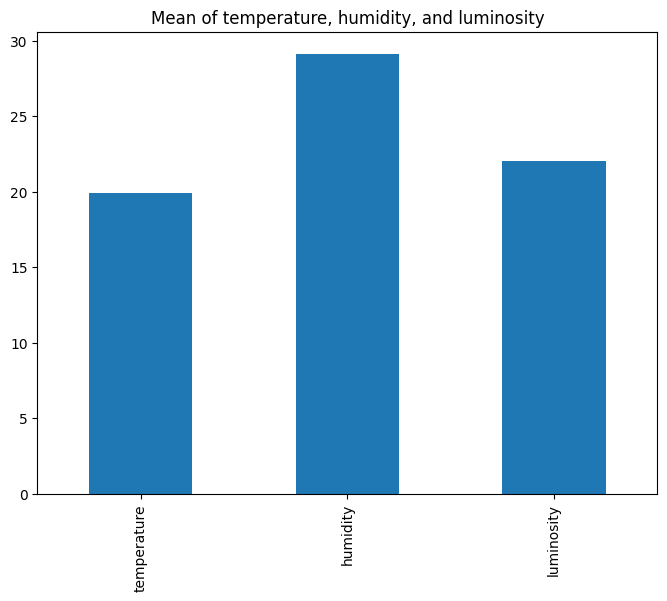

In [21]:
iot_data[['temperature','humidity','luminosity']].mean().plot.bar(figsize=(8,6),
                                                                  title="Mean of temperature, humidity, and luminosity")

### Plot the change of sensor data over various time spans.

> time span: 60 sec, 1 hour, 1 day, 1 week

#### Set date as index of timestamp

In [22]:
iot_data.set_index('date',inplace=True)

In [23]:
iot_data.info() # timestamp index

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59764 entries, 2023-11-22 14:43:42.806000 to 2023-12-07 16:45:49.528000
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  59764 non-null  float64
 1   humidity     59764 non-null  float64
 2   luminosity   59764 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 1.8 MB


In [24]:
iot_data.head()

,temperature,humidity,luminosity
date,,,
2023-11-22 14:43:42.806,20.3,45.5,63
2023-11-22 14:43:42.811,20.3,45.5,63
2023-11-22 14:43:42.811,20.3,45.5,63
2023-11-22 14:43:42.812,20.3,45.5,63
2023-11-22 14:43:42.811,20.3,45.5,63


In [25]:
# Estimate the mean of the iot data for every minute
iot_data.resample('60S').mean()

,temperature,humidity,luminosity
date,,,
2023-11-22 14:43:00,20.293548,45.525806,63.0
2023-11-22 14:44:00,20.293333,45.596667,63.0
2023-11-22 14:45:00,20.287500,45.612500,63.0
2023-11-22 14:46:00,NaN,NaN,NaN
2023-11-22 14:47:00,NaN,NaN,NaN
...,...,...,...
2023-12-07 16:41:00,23.100000,25.245283,0.0
2023-12-07 16:42:00,23.137736,25.226415,0.0
2023-12-07 16:43:00,23.173077,25.269231,0.0


<Axes: title={'center': 'Minutely change of temperature, humidity, and luminosity'}, xlabel='date'>

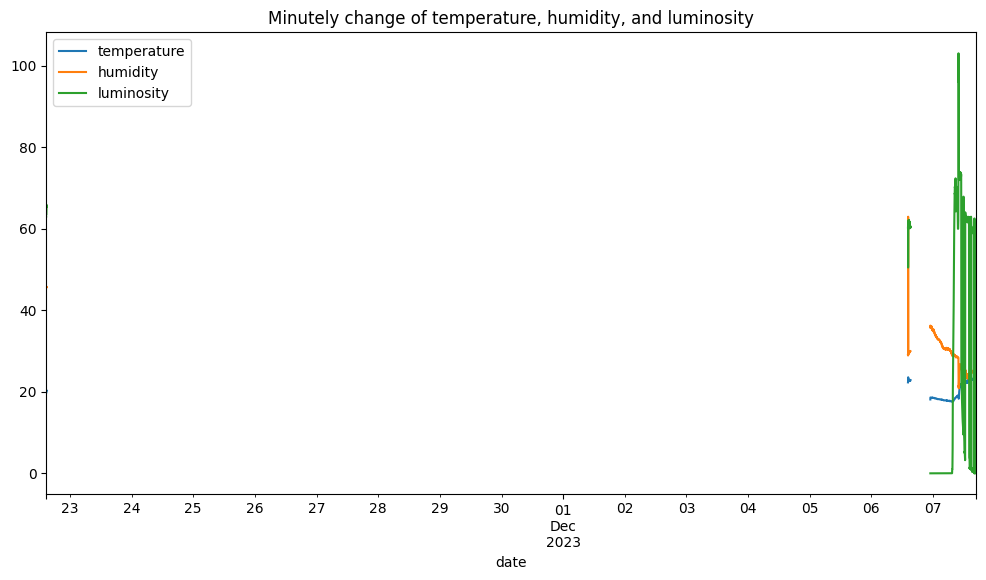

In [26]:
#  Plot mean of the iot data per every minute
iot_data.resample('60S').mean().plot(figsize=(12,6),
                                     title='Minutely change of temperature, humidity, and luminosity')

In [27]:
# Estimate the mean of iot data for every hour
iot_data.resample('H').mean()  # mean per each hour

,temperature,humidity,luminosity
date,,,
2023-11-22 14:00:00,20.219185,45.655396,64.326139
2023-11-22 15:00:00,NaN,NaN,NaN
2023-11-22 16:00:00,NaN,NaN,NaN
2023-11-22 17:00:00,NaN,NaN,NaN
2023-11-22 18:00:00,NaN,NaN,NaN
...,...,...,...
2023-12-07 12:00:00,22.476178,24.863524,34.422651
2023-12-07 13:00:00,22.565707,23.825308,62.397343
2023-12-07 14:00:00,22.931392,24.538987,11.656329


<Axes: title={'center': 'Hourly change of temperature, humidity, and luminosity'}, xlabel='date'>

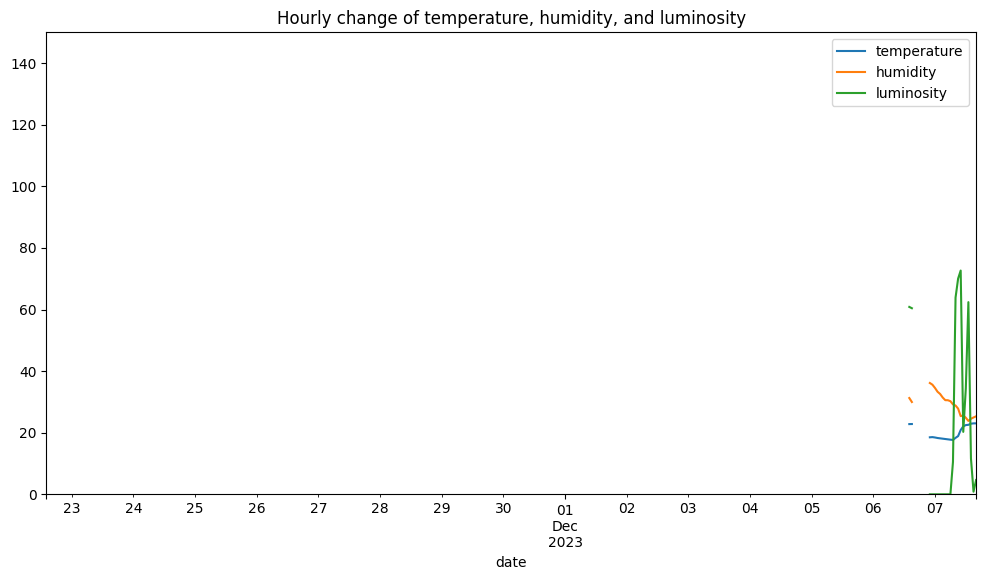

In [28]:
#  Plot mean of the iot data per every hour
iot_data.resample('H').mean().plot(figsize=(12,6),
                                   title='Hourly change of temperature, humidity, and luminosity',
                                   ylim=[0,150])

In [29]:
# Estimate the mean of iot data for every day
iot_data.resample('D').mean()

,temperature,humidity,luminosity
date,,,
2023-11-22,20.219185,45.655396,64.326139
2023-11-23,NaN,NaN,NaN
2023-11-24,NaN,NaN,NaN
2023-11-25,NaN,NaN,NaN
2023-11-26,NaN,NaN,NaN
2023-11-27,NaN,NaN,NaN
2023-11-28,NaN,NaN,NaN
2023-11-29,NaN,NaN,NaN
2023-11-30,NaN,NaN,NaN


<Axes: title={'center': 'Daily change of temperature, humidity, and luminosity'}, xlabel='date'>

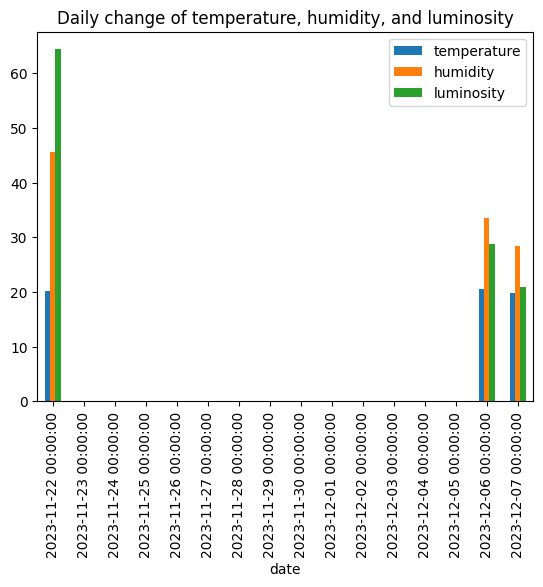

In [30]:
#  Plot mean of the iot data per every day
iot_data.resample('D').mean().plot(kind='bar', #marker='o', ms=6, figsize=(12,6),
                                   title='Daily change of temperature, humidity, and luminosity')

In [31]:
# Estimate the mean of iot data for every week
iot_data.resample('W').mean()

,temperature,humidity,luminosity
date,,,
2023-11-26,20.219185,45.655396,64.326139
2023-12-03,NaN,NaN,NaN
2023-12-10,19.933031,29.019696,21.727686


<Axes: title={'center': 'Weekly change of temperature, humidity, and luminosity'}, xlabel='date'>

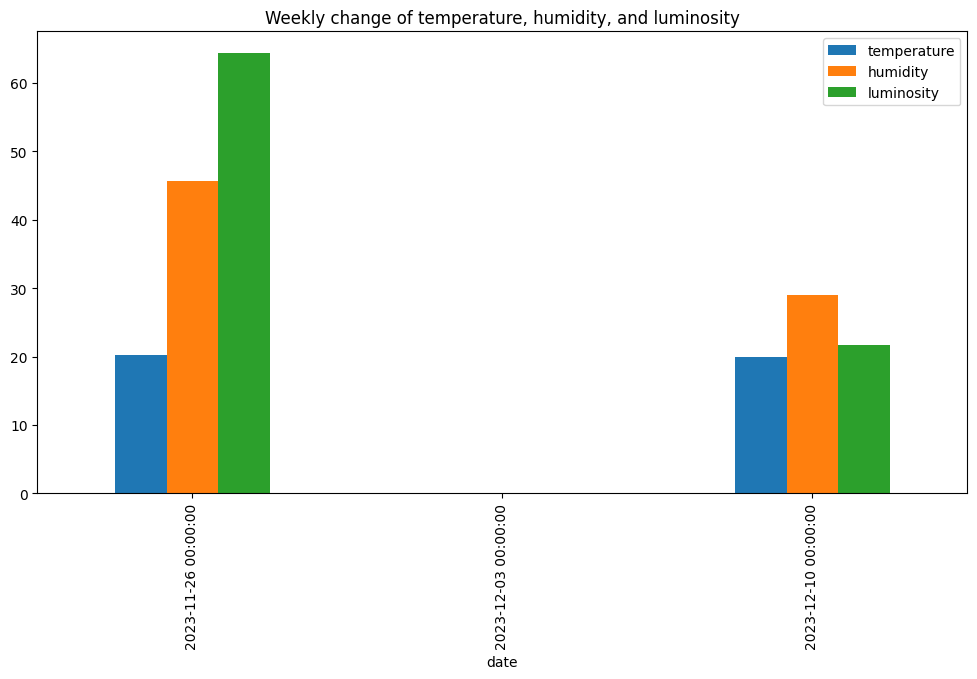

In [32]:
#  Plot mean of the iot data per every week
iot_data.resample('W').mean().plot(kind='bar', #marker='o', ms=10,
                                   figsize=(12,6),
                                   title='Weekly change of temperature, humidity, and luminosity')

## 와, Great!

---